# Speech Emotion Recognition Using Deep Learning

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


####Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import IPython as ipd
import librosa
import librosa.display
import IPython.display as ipd  #to play audio signal
from IPython.display import Audio
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout


####Loading Ravdess Dataset

In [5]:
ravdess = "/content/drive/MyDrive/Ravdess/audio_speech_actors_01-24"
ravdess_directory_list = os.listdir(ravdess)
print(sorted(ravdess_directory_list))

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [6]:
paths=[]
labels=[]
# Walk through the directory and collect file paths and labels
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Ravdess/audio_speech_actors_01-24'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        # Extract emotion label from the file name
        label = filename.split('-')[2].split('.')[0]  # Extract emotion code
        labels.append(label)
print('Ravdess is loaded')

Ravdess is loaded


In [7]:
len(paths)

1440

In [8]:
paths[:5]

['/content/drive/MyDrive/Ravdess/audio_speech_actors_01-24/Actor_08/03-01-02-01-01-02-08.wav',
 '/content/drive/MyDrive/Ravdess/audio_speech_actors_01-24/Actor_08/03-01-01-01-01-02-08.wav',
 '/content/drive/MyDrive/Ravdess/audio_speech_actors_01-24/Actor_08/03-01-02-01-02-02-08.wav',
 '/content/drive/MyDrive/Ravdess/audio_speech_actors_01-24/Actor_08/03-01-02-01-02-01-08.wav',
 '/content/drive/MyDrive/Ravdess/audio_speech_actors_01-24/Actor_08/03-01-01-01-02-01-08.wav']

In [9]:
labels[:5]

['02', '01', '02', '02', '01']

In [10]:
import pandas as pd
Rav_df=pd.DataFrame()
Rav_df['Speech']=paths
Rav_df['Label']=labels
Rav_df.head()

,Speech,Label
0,/content/drive/MyDrive/Ravdess/audio_speech_ac...,02
1,/content/drive/MyDrive/Ravdess/audio_speech_ac...,01
2,/content/drive/MyDrive/Ravdess/audio_speech_ac...,02
3,/content/drive/MyDrive/Ravdess/audio_speech_ac...,02
4,/content/drive/MyDrive/Ravdess/audio_speech_ac...,01


In [11]:
dct = {'01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fear', '07': 'disgust', '08': 'surprise'}
# Replace label values with corresponding emotions
Rav_df['Label'] = Rav_df['Label'].replace(dct)
Rav_df.head()

,Speech,Label
0,/content/drive/MyDrive/Ravdess/audio_speech_ac...,calm
1,/content/drive/MyDrive/Ravdess/audio_speech_ac...,neutral
2,/content/drive/MyDrive/Ravdess/audio_speech_ac...,calm
3,/content/drive/MyDrive/Ravdess/audio_speech_ac...,calm
4,/content/drive/MyDrive/Ravdess/audio_speech_ac...,neutral


#####Filtering out rows with 'calm, surprise,neutral' emotions,  removing from dataframe & resetting the index of dataframe

In [12]:
Rav_df = Rav_df[Rav_df['Label'] != 'calm']
Rav_df = Rav_df.drop(Rav_df[Rav_df['Label'] == 'calm'].index)
Rav_df.reset_index(drop=True, inplace=True)
Rav_df.head()

,Speech,Label
0,/content/drive/MyDrive/Ravdess/audio_speech_ac...,neutral
1,/content/drive/MyDrive/Ravdess/audio_speech_ac...,neutral
2,/content/drive/MyDrive/Ravdess/audio_speech_ac...,neutral
3,/content/drive/MyDrive/Ravdess/audio_speech_ac...,neutral
4,/content/drive/MyDrive/Ravdess/audio_speech_ac...,angry


In [13]:
Rav_df.shape

(1248, 2)

In [14]:
Rav_df['Label'].value_counts()

Label
angry       192
surprise    192
fear        192
disgust     192
happy       192
sad         192
neutral      96
Name: count, dtype: int64

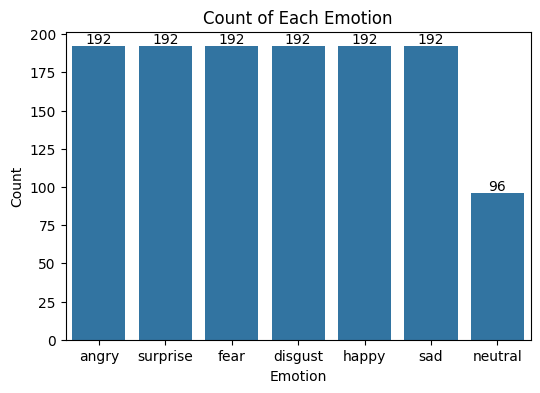

In [15]:
# Count the occurrences of each emotion
emotion_counts = Rav_df['Label'].value_counts()
plt.figure(figsize=(6,4))
ax = sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
for i, count in enumerate(emotion_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Count of Each Emotion')
plt.show()

In [16]:
print(Rav_df['Label'].unique())

['neutral' 'angry' 'surprise' 'fear' 'happy' 'disgust' 'sad']


In [17]:
paths=[]
labels=[]
for dirname,_,filenames in os.walk('/content/drive/MyDrive/Tess'):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    #print(filename)
    label=filename.split('_')[-1]
    #print(label)
    label=label.split('.')[0]
    labels.append(label.lower())
print('TESS is loaded')

TESS is loaded


In [18]:
len(paths)

2800

In [19]:
paths[:5]

['/content/drive/MyDrive/Tess/OAF_disgust/OAF_hate_disgust.wav',
 '/content/drive/MyDrive/Tess/OAF_disgust/OAF_jar_disgust.wav',
 '/content/drive/MyDrive/Tess/OAF_disgust/OAF_hit_disgust.wav',
 '/content/drive/MyDrive/Tess/OAF_disgust/OAF_dab_disgust.wav',
 '/content/drive/MyDrive/Tess/OAF_disgust/OAF_kick_disgust.wav']

In [20]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [21]:
import pandas as pd
Tess_df=pd.DataFrame()
Tess_df['Speech']=paths
Tess_df['Label']=labels
Tess_df.head()

,Speech,Label
0,/content/drive/MyDrive/Tess/OAF_disgust/OAF_ha...,disgust
1,/content/drive/MyDrive/Tess/OAF_disgust/OAF_ja...,disgust
2,/content/drive/MyDrive/Tess/OAF_disgust/OAF_hi...,disgust
3,/content/drive/MyDrive/Tess/OAF_disgust/OAF_da...,disgust
4,/content/drive/MyDrive/Tess/OAF_disgust/OAF_ki...,disgust


In [22]:
Tess_df['Label'].unique()

array(['disgust', 'neutral', 'fear', 'ps', 'sad', 'happy', 'angry'],
      dtype=object)

In [23]:
# Replace 'ps' with 'surprise' in the 'Label' column
Tess_df['Label'] = Tess_df['Label'].replace('ps', 'surprise')
print(Tess_df.head())

                                              Speech    Label
0  /content/drive/MyDrive/Tess/OAF_disgust/OAF_ha...  disgust
1  /content/drive/MyDrive/Tess/OAF_disgust/OAF_ja...  disgust
2  /content/drive/MyDrive/Tess/OAF_disgust/OAF_hi...  disgust
3  /content/drive/MyDrive/Tess/OAF_disgust/OAF_da...  disgust
4  /content/drive/MyDrive/Tess/OAF_disgust/OAF_ki...  disgust


In [24]:
Tess_df.shape

(2800, 2)

#####Filter out and remove 'surprise, neutral' emotion from the dataframe and reset the index

In [25]:
'''Tess_df = Tess_df[Tess_df['Label'] != 'surprise']
Tess_df = Tess_df.drop(Tess_df[Tess_df['Label'] == 'surprise'].index)
Tess_df = Tess_df[Tess_df['Label'] != 'neutral']
Tess_df = Tess_df.drop(Tess_df[Tess_df['Label'] == 'neutral'].index)
Tess_df.reset_index(drop=True, inplace=True)
Tess_df.head()'''

"Tess_df = Tess_df[Tess_df['Label'] != 'surprise']\nTess_df = Tess_df.drop(Tess_df[Tess_df['Label'] == 'surprise'].index)\nTess_df = Tess_df[Tess_df['Label'] != 'neutral']\nTess_df = Tess_df.drop(Tess_df[Tess_df['Label'] == 'neutral'].index)\nTess_df.reset_index(drop=True, inplace=True)\nTess_df.head()"

In [26]:
Tess_df.Label.value_counts()

Label
disgust     400
neutral     400
fear        400
surprise    400
sad         400
happy       400
angry       400
Name: count, dtype: int64

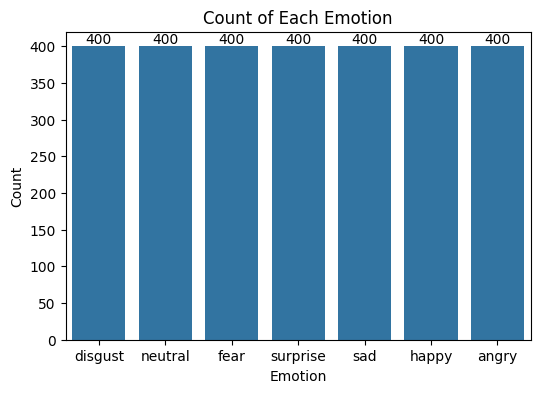

In [27]:
# Count the occurrences of each emotion
emotion_counts = Tess_df['Label'].value_counts()
plt.figure(figsize=(6,4))
ax = sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
for i, count in enumerate(emotion_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Count of Each Emotion')
plt.show()

In [28]:
print(Tess_df['Label'].unique())

['disgust' 'neutral' 'fear' 'surprise' 'sad' 'happy' 'angry']


In [29]:
Tess_df.Label.value_counts()

Label
disgust     400
neutral     400
fear        400
surprise    400
sad         400
happy       400
angry       400
Name: count, dtype: int64

In [30]:
Savee = "/content/drive/MyDrive/Savee"

In [31]:
savee_directory_list = os.listdir(Savee)
file_emotion = []
file_path = []
for file in savee_directory_list:
    file_path.append(Savee +'/'+ file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Label'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Speech'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)

In [32]:
len(path_df)

480

In [33]:
path_df[:5]

,Speech
0,/content/drive/MyDrive/Savee/DC_a01.wav
1,/content/drive/MyDrive/Savee/DC_a02.wav
2,/content/drive/MyDrive/Savee/DC_a03.wav
3,/content/drive/MyDrive/Savee/DC_a05.wav
4,/content/drive/MyDrive/Savee/DC_a07.wav


In [34]:
emotion_df[:5]

,Label
0,angry
1,angry
2,angry
3,angry
4,angry


In [35]:
Savee_df.shape

(480, 2)

In [36]:
Savee_df.head()

,Label,Speech
0,angry,/content/drive/MyDrive/Savee/DC_a01.wav
1,angry,/content/drive/MyDrive/Savee/DC_a02.wav
2,angry,/content/drive/MyDrive/Savee/DC_a03.wav
3,angry,/content/drive/MyDrive/Savee/DC_a05.wav
4,angry,/content/drive/MyDrive/Savee/DC_a07.wav


In [37]:
Savee_df['Label'].unique()

array(['angry', 'fear', 'happy', 'disgust', 'neutral', 'sad', 'surprise'],
      dtype=object)

#####Filter out and remove 'surprise, neutral' emotion from the dataframe and reset the index

In [38]:
'''Savee_df = Savee_df[Savee_df['Label'] != 'surprise']
Savee_df = Savee_df.drop(Savee_df[Savee_df['Label'] == 'surprise'].index)
Savee_df = Savee_df[Savee_df['Label'] != 'neutral']
Savee_df = Savee_df.drop(Savee_df[Savee_df['Label'] == 'neutral'].index)
Savee_df.reset_index(drop=True, inplace=True)
Savee_df.head()'''

"Savee_df = Savee_df[Savee_df['Label'] != 'surprise']\nSavee_df = Savee_df.drop(Savee_df[Savee_df['Label'] == 'surprise'].index)\nSavee_df = Savee_df[Savee_df['Label'] != 'neutral']\nSavee_df = Savee_df.drop(Savee_df[Savee_df['Label'] == 'neutral'].index)\nSavee_df.reset_index(drop=True, inplace=True)\nSavee_df.head()"

In [39]:
print(Savee_df.Label.value_counts())

Label
neutral     120
fear         60
angry        60
happy        60
disgust      60
sad          60
surprise     60
Name: count, dtype: int64


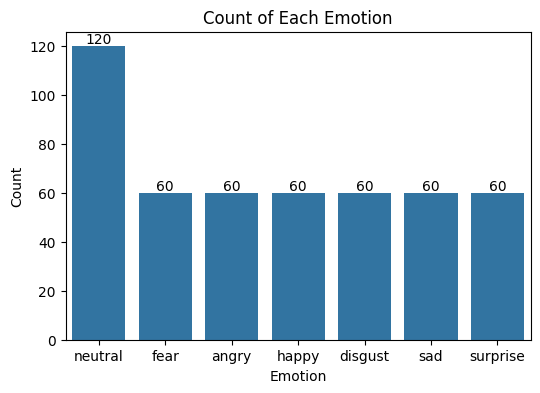

In [40]:
# Count the occurrences of each emotion
emotion_counts = Savee_df['Label'].value_counts()
plt.figure(figsize=(6,4))
ax = sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
for i, count in enumerate(emotion_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Count of Each Emotion')
plt.show()

In [41]:
print(Savee_df.Label.unique())

['angry' 'fear' 'happy' 'disgust' 'neutral' 'sad' 'surprise']


In [42]:
len(Savee_df)

480

####Combining all the dataframes into single dataframe 'df'

In [43]:
df = pd.concat([Tess_df, Rav_df, Savee_df], ignore_index=True)
df.head()

,Speech,Label
0,/content/drive/MyDrive/Tess/OAF_disgust/OAF_ha...,disgust
1,/content/drive/MyDrive/Tess/OAF_disgust/OAF_ja...,disgust
2,/content/drive/MyDrive/Tess/OAF_disgust/OAF_hi...,disgust
3,/content/drive/MyDrive/Tess/OAF_disgust/OAF_da...,disgust
4,/content/drive/MyDrive/Tess/OAF_disgust/OAF_ki...,disgust


In [44]:
len(df)

4528

In [45]:
df['Label'].value_counts()

Label
disgust     652
fear        652
surprise    652
happy       652
sad         652
angry       652
neutral     616
Name: count, dtype: int64

In [46]:
df.shape

(4528, 2)

####Two functions 'waveform' & 'spectogram' are designed for audio visualization for understanding the characteristics of the audio in the context of emotions using the librosa library in Python

In [47]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

**For Emotion = 'Happy'**

Load an audio file, visualize its waveform and spectrogram, and play the audio file

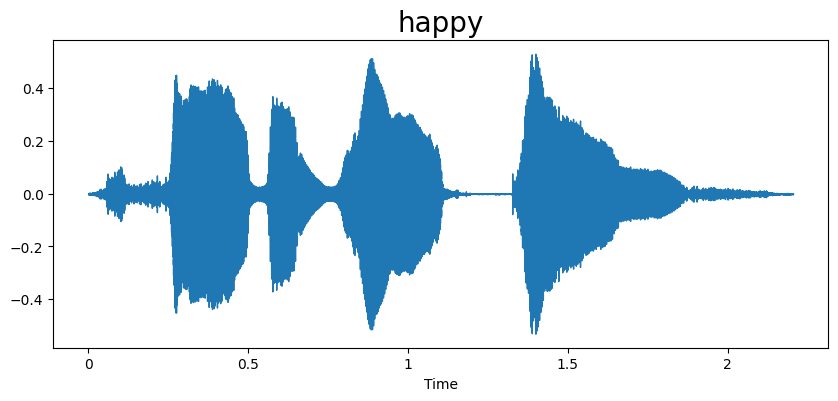

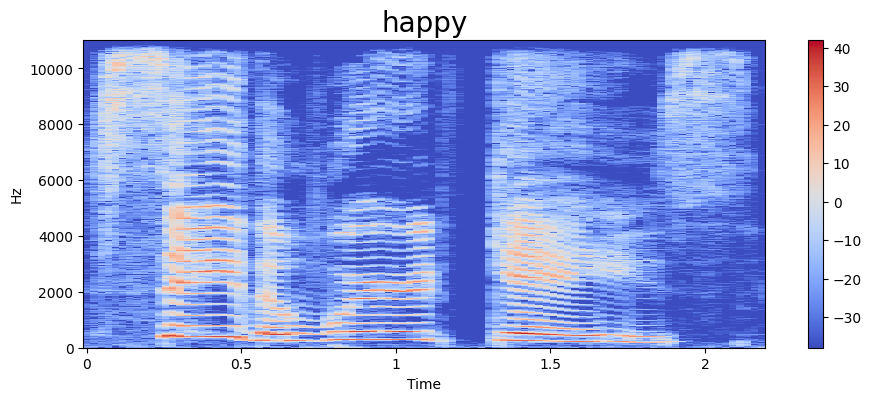

In [48]:
import numpy as np
emotion = 'happy'
path = np.array(df['Speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**For Emotion = 'Angry'**

Load an audio file, visualize its waveform and spectrogram, and play the audio file

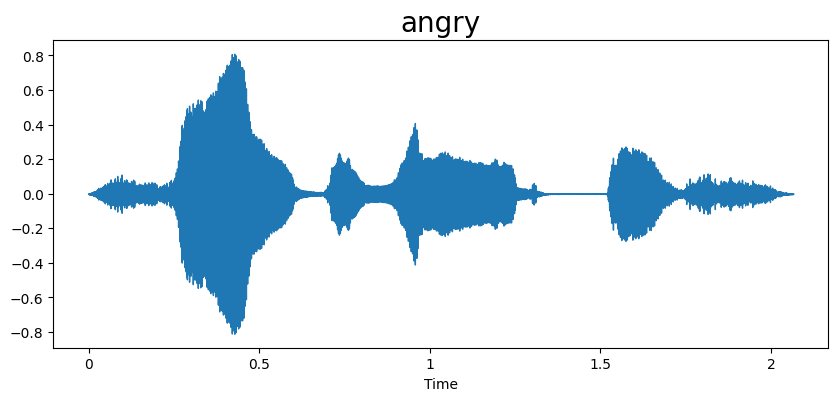

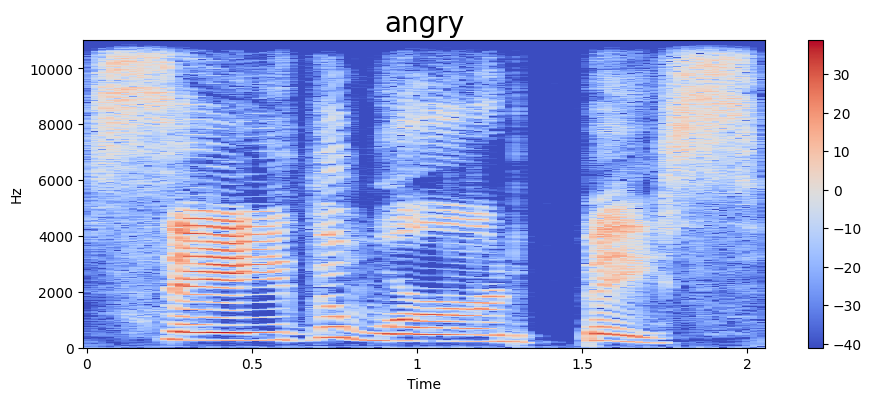

In [49]:
import numpy as np
emotion = 'angry'
path = np.array(df['Speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**For Emotion = 'Sad'**

Load an audio file, visualize its waveform and spectrogram, and play the audio file

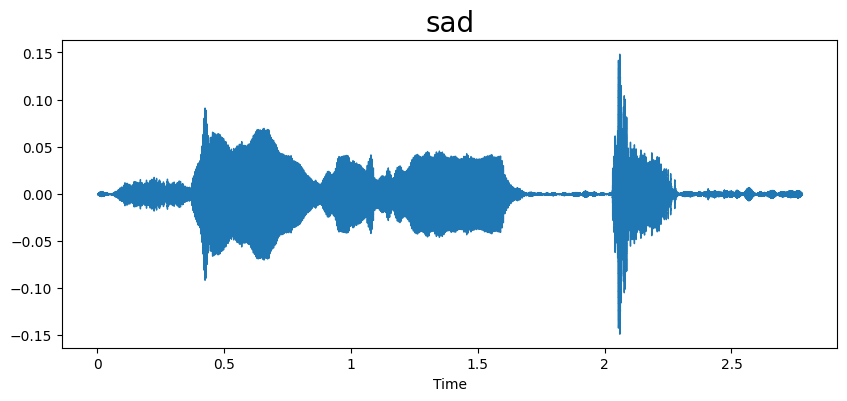

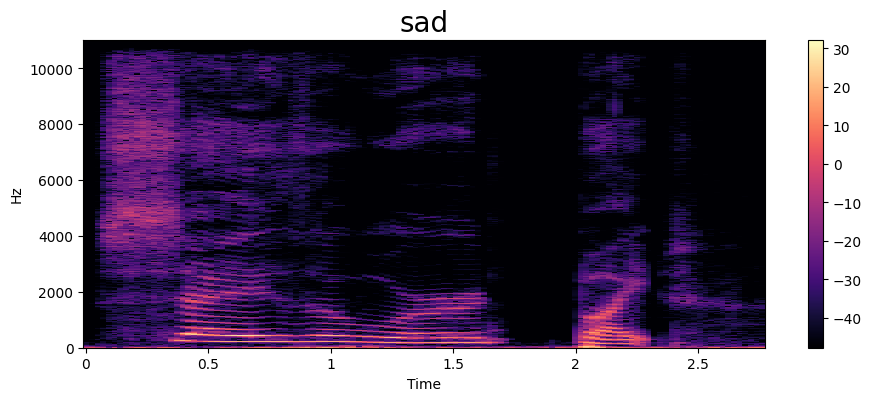

In [50]:
import numpy as np
emotion = 'sad'
path = np.array(df['Speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**For Emotion = 'Disgust'**

Load an audio file, visualize its waveform and spectrogram, and play the audio file

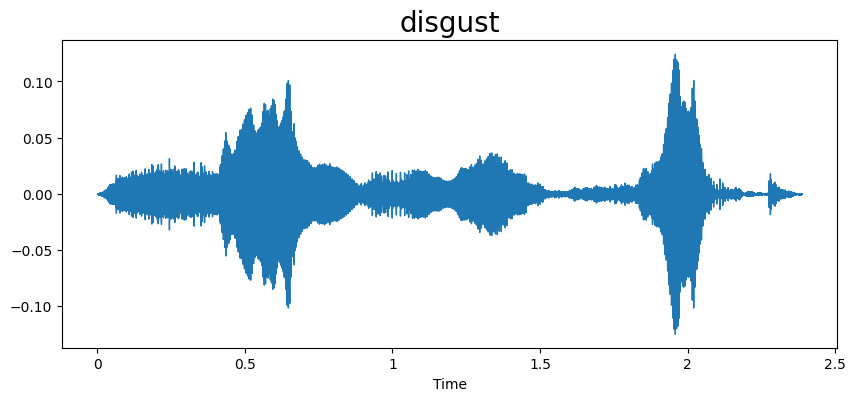

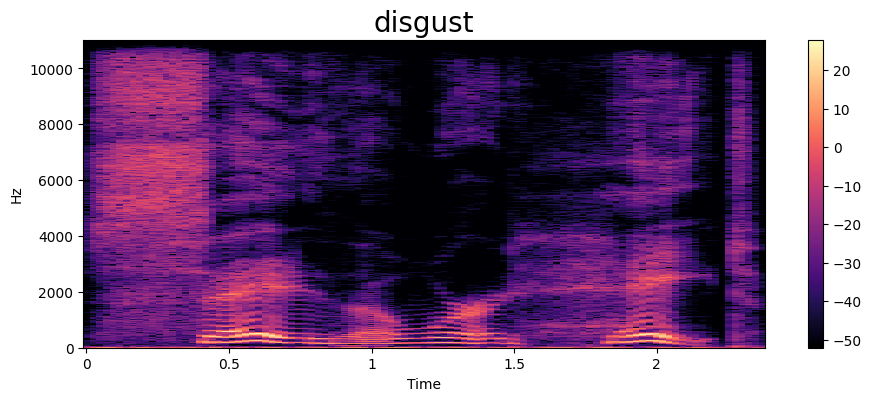

In [51]:
import numpy as np
emotion = 'disgust'
path = np.array(df['Speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**For Emotion = 'Fear'**

Load an audio file, visualize its waveform and spectrogram, and play the audio file

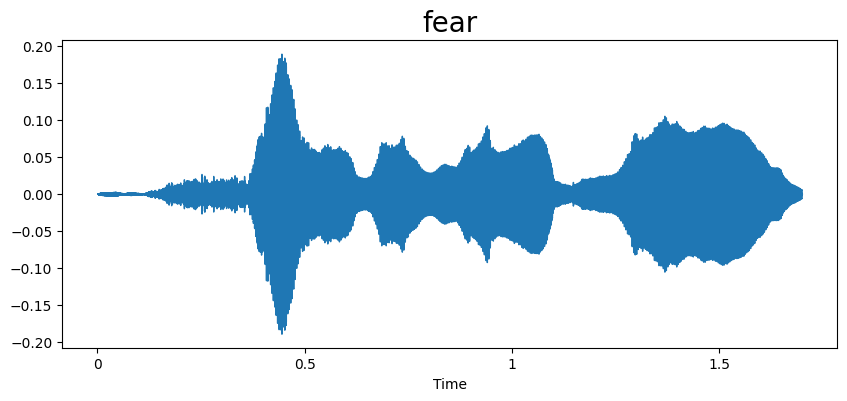

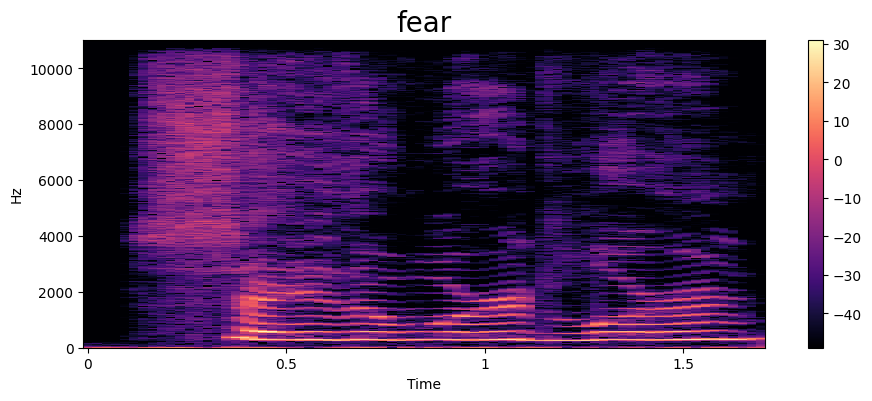

In [52]:
import numpy as np
emotion = 'fear'
path = np.array(df['Speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**For Emotion = 'Surprise'**

Load an audio file, visualize its waveform and spectrogram, and play the audio file

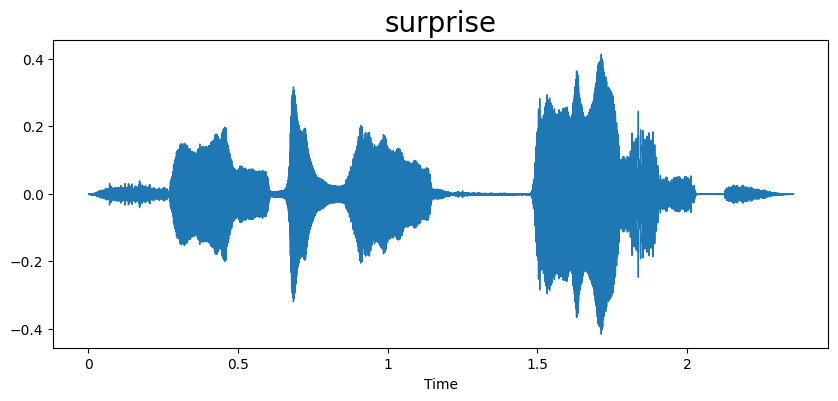

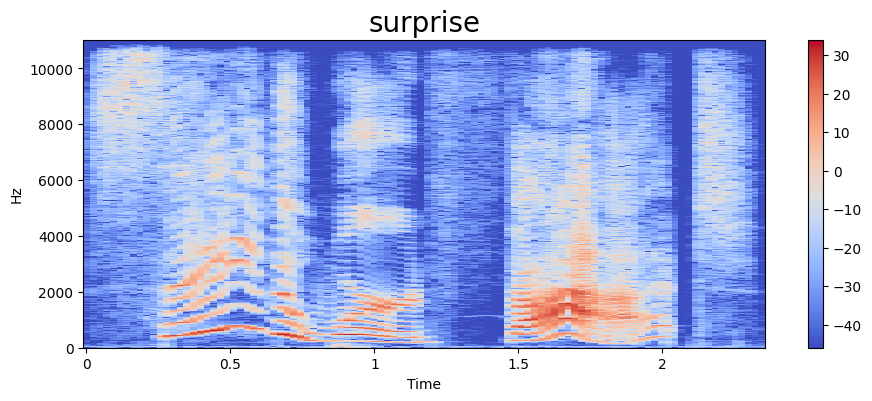

In [53]:
import numpy as np
emotion = 'surprise'
path = np.array(df['Speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**For Emotion = 'Neutral'**

Load an audio file, visualize its waveform and spectrogram, and play the audio file

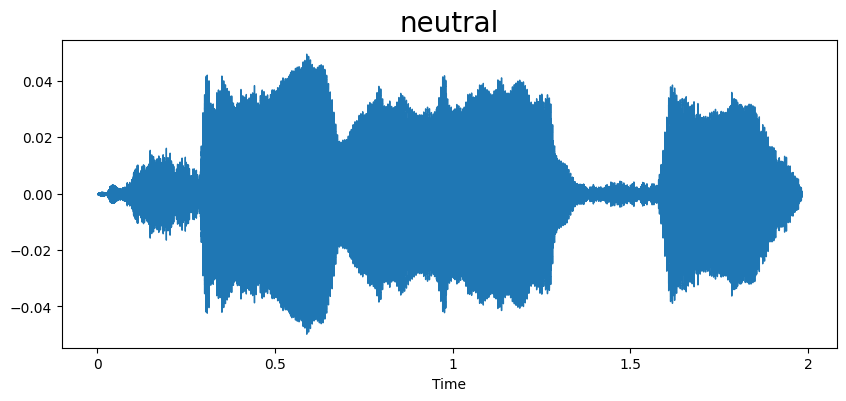

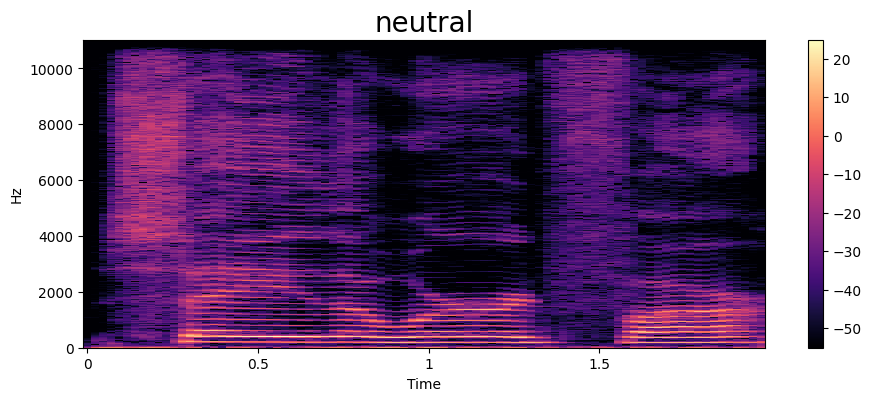

In [54]:
import numpy as np
emotion = 'neutral'
path = np.array(df['Speech'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# Feature Extraction

####**1. Mel-Frequency Cepstral Coefficients (MFCCs):**


In [55]:
# compute MFCCs for each audio file
def extract_mfcc(filename):
    x, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [56]:
# Apply the extract_mfcc function to each row in the 'Speech' column
X_mfcc = df['Speech'].apply(lambda X: extract_mfcc(X))
X_mfcc

0       [-471.9949, 102.3901, 14.029285, 7.7943325, 18...
1       [-473.4388, 127.29154, 20.212687, -17.877104, ...
2       [-389.21918, 100.022255, 6.3887835, -0.4074289...
3       [-466.92065, 112.404884, 14.052377, -4.6292057...
4       [-472.7713, 87.74459, 2.7750783, 10.13996, 20....
                              ...                        
4523    [-529.01605, 131.75406, 25.293453, 39.81962, 1...
4524    [-535.35974, 150.25688, 24.683945, 21.996786, ...
4525    [-565.91876, 98.22521, 21.484533, 36.910328, -...
4526    [-531.93134, 113.948814, 19.898462, 24.734169,...
4527    [-585.394, 141.94766, 29.259727, 38.488464, 18...
Name: Speech, Length: 4528, dtype: object

In [57]:
# Display the resulting MFCCs
X_mfcc[0]

array([-4.7199490e+02,  1.0239010e+02,  1.4029285e+01,  7.7943325e+00,
        1.8037119e+01, -8.5472422e+00, -1.1635850e+01,  3.5064254e+00,
       -1.6800341e+01, -3.4765067e+00, -1.3158127e+01,  1.4224833e-01,
       -4.4227129e-01, -2.8688970e+00,  9.2736584e-01,  3.0060782e+00,
       -2.4622190e+00,  5.9850779e+00, -2.1858661e+00, -1.5299134e+00,
       -7.4563438e-01, -3.9294498e+00, -7.3121204e+00,  1.1915966e+00,
       -4.5922580e+00,  4.7461371e+00,  5.7565612e-01,  5.5775604e+00,
        3.8446867e+00,  3.6163232e+00,  2.6218694e-01,  3.6565068e+00,
       -5.4072315e-01,  2.3289633e+00,  8.7312233e-01,  7.0872788e+00,
        3.4472392e+00,  5.9959440e+00,  9.3124037e+00,  9.2849140e+00],
      dtype=float32)

In [58]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(4528, 40)

*  **Function to plot MFCC**
* The color variations in the plot represent the intensity or magnitude of the MFCC coefficients

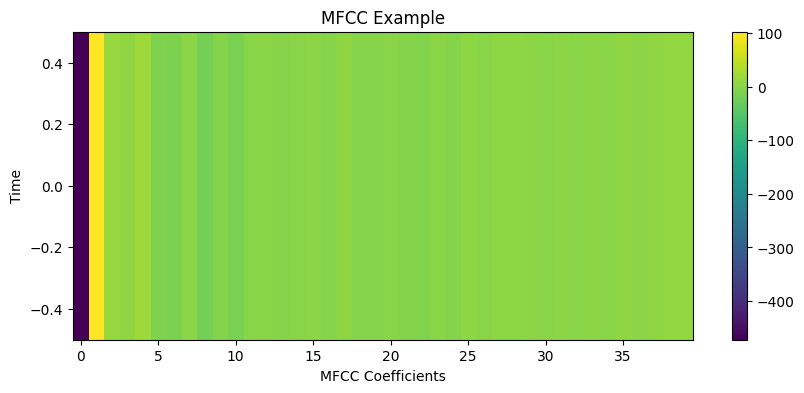

In [59]:
def plot_mfcc(mfcc, title="MFCC"):
    plt.figure(figsize=(10, 4))
    plt.imshow(mfcc.reshape(1, -1), cmap='viridis', origin='lower', aspect='auto')
    plt.title(title)
    plt.xlabel('MFCC Coefficients')
    plt.ylabel('Time')
    plt.colorbar()
    plt.show()
# Example for plotting MFCCs
mfcc_example = extract_mfcc(df['Speech'][0])
plot_mfcc(mfcc_example, title="MFCC Example")

####**2. Chroma Features**

In [60]:
def extract_chroma(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
    return chroma
# Example usage for a single audio file
extract_chroma(df['Speech'][0])
# Applying Chroma feature extraction to all audio files in the dataframe
X_chroma = df['Speech'].apply(lambda x: extract_chroma(x))
X_chroma

0       [0.37300432, 0.33279967, 0.28527883, 0.3112803...
1       [0.23371786, 0.23848665, 0.23442422, 0.2877291...
2       [0.39843562, 0.33335704, 0.2648463, 0.24919705...
3       [0.2028397, 0.2068122, 0.22938368, 0.22984603,...
4       [0.39800698, 0.38481882, 0.37728164, 0.3599181...
                              ...                        
4523    [0.3666124, 0.41133744, 0.3326113, 0.25959074,...
4524    [0.28759944, 0.36631775, 0.41926184, 0.3477392...
4525    [0.3982943, 0.3638367, 0.3645544, 0.39450616, ...
4526    [0.40855733, 0.45621312, 0.3853902, 0.3750962,...
4527    [0.3717882, 0.32154885, 0.29558343, 0.220325, ...
Name: Speech, Length: 4528, dtype: object

In [61]:
# The length of the arrays is determined by the number of pitch classes
X_chroma[0]

array([0.37300432, 0.33279967, 0.28527883, 0.31128034, 0.3979273 ,
       0.38205928, 0.30746856, 0.2914728 , 0.2579251 , 0.2863345 ,
       0.35579306, 0.33145916], dtype=float32)

In [62]:
X = [x for x in X_chroma]
X = np.array(X)
X.shape

(4528, 12)

*  **Function to plot Chroma features**
* The color intensity indicates the strength or presence of each Chroma coefficient at different time points.

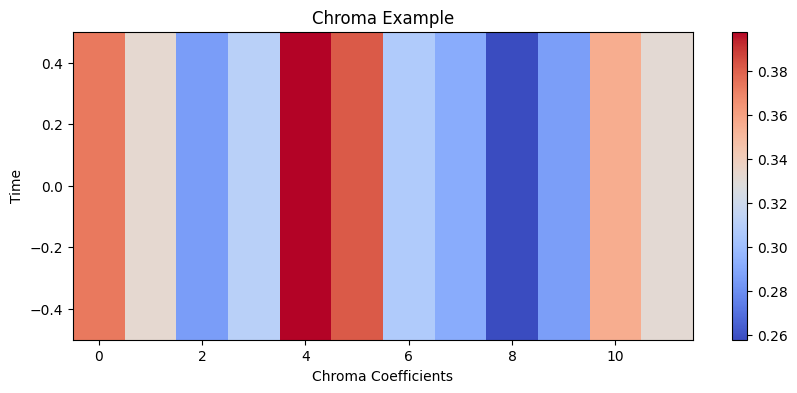

In [63]:
def plot_chroma(chroma, title="Chroma"):
    plt.figure(figsize=(10, 4))
    plt.imshow(chroma.reshape(1, -1), cmap='coolwarm', origin='lower', aspect='auto')
    plt.title(title)
    plt.xlabel('Chroma Coefficients')
    plt.ylabel('Time')
    plt.colorbar()
    plt.show()
# Example for plotting Chroma features
chroma_example = extract_chroma(df['Speech'][0])
plot_chroma(chroma_example, title="Chroma Example")

####**3. Zero Crossing Rate**

In [64]:
def extract_zcr(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=y).T, axis=0)
    return zcr

# Applying ZCR feature extraction to all audio files in the dataframe
X_zcr = df['Speech'].apply(lambda x: extract_zcr(x))

In [65]:
X_zcr[0]

array([0.06248214])

In [66]:
X_zcr

0        [0.06248213605182927]
1        [0.05607586596385542]
2       [0.055688175154320986]
3        [0.04829866340361446]
4        [0.06281706574675325]
                 ...          
4523    [0.036681189903846154]
4524    [0.022867838541666668]
4525    [0.044024188701923074]
4526          [0.041064453125]
4527    [0.028827373798076924]
Name: Speech, Length: 4528, dtype: object

In [67]:
X = [x for x in X_zcr]
X = np.array(X)
X.shape

(4528, 1)

####**4. RMSE (Root Mean Square Error)**

Load the audio file, compute STFT for original signal, reconstruct the signal from STFT, compute RMSE b/w origianl and reconstructed signal.

In [68]:
def extract_rmse(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    D = librosa.stft(y)
    y_reconstructed = librosa.istft(D, length=len(y))
    rmse = np.sqrt(np.mean((y - y_reconstructed) ** 2))
    return rmse

In [69]:
# Example usage for a single audio file
rmse_0 = extract_rmse(df['Speech'][0])
print("RMSE for the example audio file:", rmse_0)
# Applying RMSE feature extraction to all audio files in the dataframe
X_rmse = df['Speech'].apply(extract_rmse)
print("RMSE features extracted from all audio files:\n", X_rmse)

RMSE for the example audio file: 9.31648e-10
RMSE features extracted from all audio files:
 0       9.316480e-10
1       1.119019e-09
2       2.272583e-09
3       1.053776e-09
4       1.007056e-09
            ...     
4523    6.613296e-10
4524    9.162195e-10
4525    6.112315e-10
4526    8.412951e-10
4527    5.233435e-10
Name: Speech, Length: 4528, dtype: float32


In [70]:
# Concatenate all feature sets into a single DataFrame
X_combined = pd.concat([X_mfcc.apply(pd.Series),
                        X_chroma.apply(pd.Series),
                        X_rmse.apply(pd.Series),
                        X_zcr.apply(pd.Series)], axis=1)

# Display the combined DataFrame
print(X_combined)

              0           1          2          3          4          5   \
0    -471.994904  102.390099  14.029285   7.794333  18.037119  -8.547242   
1    -473.438812  127.291542  20.212687 -17.877104   3.650674  12.310802   
2    -389.219177  100.022255   6.388783  -0.407429  18.632723  -8.373384   
3    -466.920654  112.404884  14.052377  -4.629206  16.441374   0.114525   
4    -472.771301   87.744591   2.775078  10.139960  20.252504  -5.524190   
...          ...         ...        ...        ...        ...        ...   
4523 -529.016052  131.754059  25.293453  39.819618  14.735618  -7.386903   
4524 -535.359741  150.256882  24.683945  21.996786   3.524145 -10.570117   
4525 -565.918762   98.225212  21.484533  36.910328  -2.014354  -0.753496   
4526 -531.931335  113.948814  19.898462  24.734169  -0.858429  -1.128176   
4527 -585.393982  141.947662  29.259727  38.488464  18.701303  -8.526577   

             6         7          8          9   ...        4         5   \
0    -11.63

In [71]:
X_combined.shape

(4528, 54)

In [72]:
## input split
X_combined = np.expand_dims(X_combined, -1)
X_combined.shape

(4528, 54, 1)

By combining different types of features, you may capture a more comprehensive representation of the underlying patterns in the data. Each set of features may highlight different aspects or characteristics of the data, and combining them can provide a richer feature space.

In [73]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['Label']])

In [74]:
y = y.toarray()

In [75]:
y.shape

(4528, 7)

In [76]:
len(X_combined), len(y)

(4528, 4528)

##### Split the data into training and testing sets

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

###**Deep Leaning Models Implementation**

####1. LSTM (Long Short Term Memory) :

In [105]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
LSTM_model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(54,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])
LSTM_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
LSTM_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 7)                

In [106]:
# Train the model
history = LSTM_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
57/57 [==============================] - 3s 18ms/step - loss: 1.6177 - accuracy: 0.3335 - val_loss: 1.3329 - val_accuracy: 0.4857
Epoch 2/50
57/57 [==============================] - 1s 10ms/step - loss: 1.2665 - accuracy: 0.5293 - val_loss: 1.0704 - val_accuracy: 0.6247
Epoch 3/50
57/57 [==============================] - 1s 11ms/step - loss: 1.1067 - accuracy: 0.6019 - val_loss: 1.0108 - val_accuracy: 0.6402
Epoch 4/50
57/57 [==============================] - 1s 10ms/step - loss: 1.0979 - accuracy: 0.6162 - val_loss: 0.9914 - val_accuracy: 0.6634
Epoch 5/50
57/57 [==============================] - 1s 11ms/step - loss: 1.0190 - accuracy: 0.6411 - val_loss: 0.8956 - val_accuracy: 0.6865
Epoch 6/50
57/57 [==============================] - 1s 10ms/step - loss: 0.9653 - accuracy: 0.6615 - val_loss: 0.8755 - val_accuracy: 0.6932
Epoch 7/50
57/57 [==============================] - 1s 12ms/step - loss: 0.9669 - accuracy: 0.6596 - val_loss: 0.8687 - val_accuracy: 0.6843
Epoch 8/50
57

Visual Representation of Train, Validation accuracies & losses

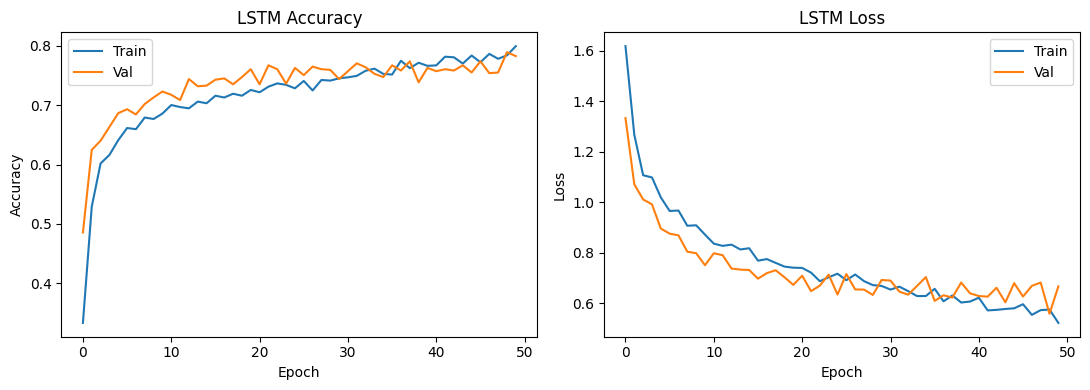

In [107]:
plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.tight_layout()
plt.show()

Generating predictions on test data, Calculate Confusion Matrix & Plotting it.

29/29 [==============================] - 1s 6ms/step


<Figure size 600x600 with 0 Axes>

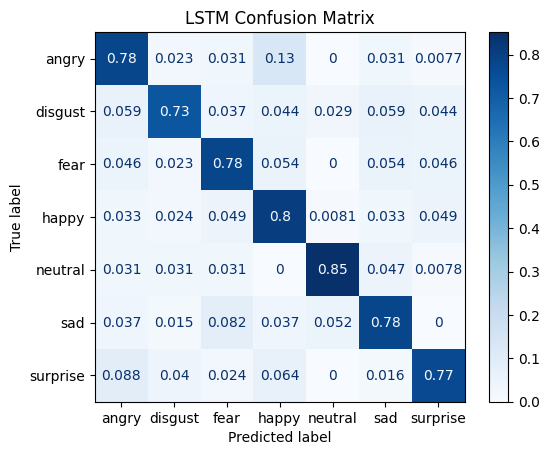

In [108]:
y_pred = LSTM_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_labels, y_pred_labels, normalize='true')

plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=enc.categories_[0])
disp.plot(cmap='Blues')
plt.title('LSTM Confusion Matrix')
plt.show()

In [109]:
# Evaluate the model
test_loss, test_accuracy = LSTM_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

29/29 [==============================] - 0s 8ms/step - loss: 0.6666 - accuracy: 0.7826
Test Accuracy: 78.26%


In [118]:
from sklearn.metrics import precision_score, recall_score

# Predict labels for test data
y_pred = LSTM_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Calculate precision and recall
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')

# Print precision and recall
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


29/29 [==============================] - 0s 4ms/step
Precision: 0.7873
Recall: 0.7826


####2. CNN (Convolutional Neural Network ) :

In [83]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

CNN_Model = Sequential()
CNN_Model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(54, 1)))
CNN_Model.add(MaxPooling1D(pool_size=2))
CNN_Model.add(Conv1D(32, kernel_size=3, activation='relu'))
CNN_Model.add(MaxPooling1D(pool_size=2))
# Flatten the output for the dense layer
CNN_Model.add(Flatten())
CNN_Model.add(Dense(128, activation='relu'))
CNN_Model.add(Dropout(0.5))
CNN_Model.add(Dense(7, activation='softmax'))

# Compile the model with categorical crossentropy loss and Adam optimizer
CNN_Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
CNN_Model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 52, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 26, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 24, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 12, 32)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [84]:
# Train the model
history = CNN_Model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
57/57 [==============================] - 4s 13ms/step - loss: 1.9523 - accuracy: 0.4277 - val_loss: 0.9659 - val_accuracy: 0.7042
Epoch 2/50
57/57 [==============================] - 0s 5ms/step - loss: 1.0098 - accuracy: 0.6532 - val_loss: 0.7792 - val_accuracy: 0.7539
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.8713 - accuracy: 0.6795 - val_loss: 0.6872 - val_accuracy: 0.7638
Epoch 4/50
57/57 [==============================] - 0s 5ms/step - loss: 0.7981 - accuracy: 0.7107 - val_loss: 0.6505 - val_accuracy: 0.7715
Epoch 5/50
57/57 [==============================] - 0s 5ms/step - loss: 0.7366 - accuracy: 0.7300 - val_loss: 0.6006 - val_accuracy: 0.7804
Epoch 6/50
57/57 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.7383 - val_loss: 0.5735 - val_accuracy: 0.7936
Epoch 7/50
57/57 [==============================] - 0s 7ms/step - loss: 0.6616 - accuracy: 0.7559 - val_loss: 0.5554 - val_accuracy: 0.7958
Epoch 8/50
57/57 [=

Visual Representation of Train, Validation accuracies & losses

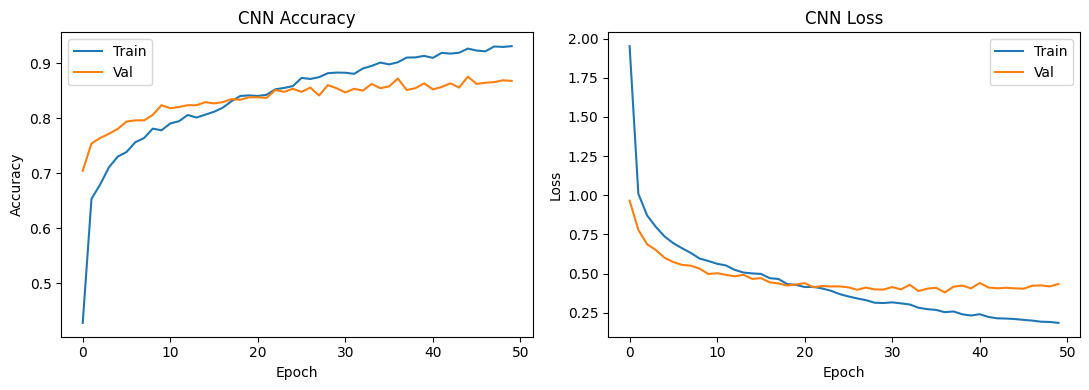

In [85]:
plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.tight_layout()
plt.show()

Generating predictions on test data, Calculate Confusion Matrix & Plotting it.

29/29 [==============================] - 0s 3ms/step


<Figure size 600x600 with 0 Axes>

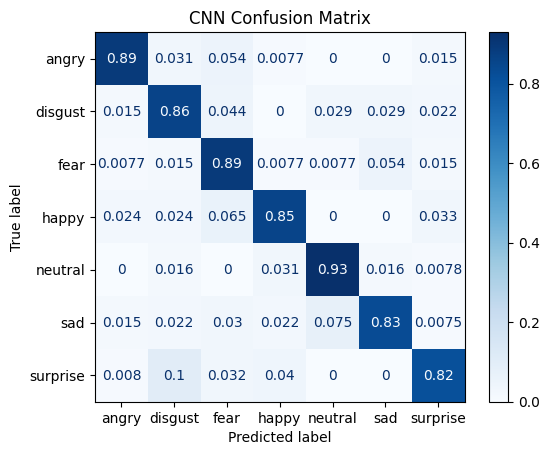

In [86]:
y_pred = CNN_Model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_labels, y_pred_labels, normalize='true')

plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=enc.categories_[0])
disp.plot(cmap='Blues')
plt.title('CNN Confusion Matrix')
plt.show()

In [87]:
# Evaluate the model
test_loss, test_accuracy = CNN_Model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

29/29 [==============================] - 0s 5ms/step - loss: 0.4336 - accuracy: 0.8675
Test Accuracy: 86.75%


In [116]:
from sklearn.metrics import precision_score, recall_score

# Predict labels for test data
y_pred = CNN_Model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Calculate precision and recall
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')

# Print precision and recall
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


29/29 [==============================] - 0s 3ms/step
Precision: 0.8699
Recall: 0.8675


####3. GRU (Gated Recurrent Unit) :

In [88]:
GRU_model = Sequential([
    GRU(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    GRU(128),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])
GRU_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
GRU_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 54, 128)           50304     
                                                                 
 dropout_4 (Dropout)         (None, 54, 128)           0         
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)               

In [89]:
# Train the model
history = GRU_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
57/57 [==============================] - 6s 24ms/step - loss: 1.8935 - accuracy: 0.1866 - val_loss: 1.7341 - val_accuracy: 0.2263
Epoch 2/50
57/57 [==============================] - 1s 10ms/step - loss: 1.6174 - accuracy: 0.3178 - val_loss: 1.4166 - val_accuracy: 0.4150
Epoch 3/50
57/57 [==============================] - 1s 10ms/step - loss: 1.4771 - accuracy: 0.3871 - val_loss: 1.3791 - val_accuracy: 0.4216
Epoch 4/50
57/57 [==============================] - 1s 10ms/step - loss: 1.4215 - accuracy: 0.4133 - val_loss: 1.3720 - val_accuracy: 0.4757
Epoch 5/50
57/57 [==============================] - 1s 10ms/step - loss: 1.3021 - accuracy: 0.4873 - val_loss: 1.1167 - val_accuracy: 0.5530
Epoch 6/50
57/57 [==============================] - 1s 10ms/step - loss: 1.2109 - accuracy: 0.5298 - val_loss: 1.0892 - val_accuracy: 0.5552
Epoch 7/50
57/57 [==============================] - 1s 10ms/step - loss: 1.1300 - accuracy: 0.5748 - val_loss: 1.0857 - val_accuracy: 0.6148
Epoch 8/50
57

Visual Representation of Train, Validation accuracies & losses

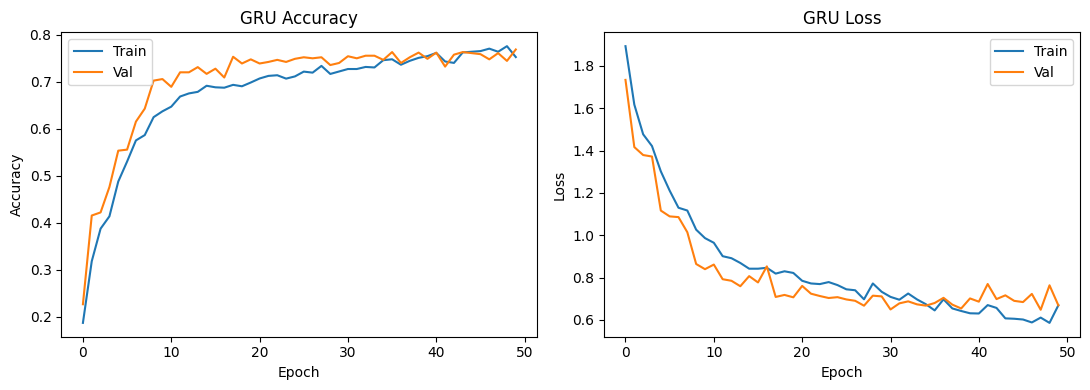

In [90]:
plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('GRU Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.tight_layout()
plt.show()

Generating predictions on test data, Calculate Confusion Matrix & Plotting it.

29/29 [==============================] - 1s 6ms/step


<Figure size 600x600 with 0 Axes>

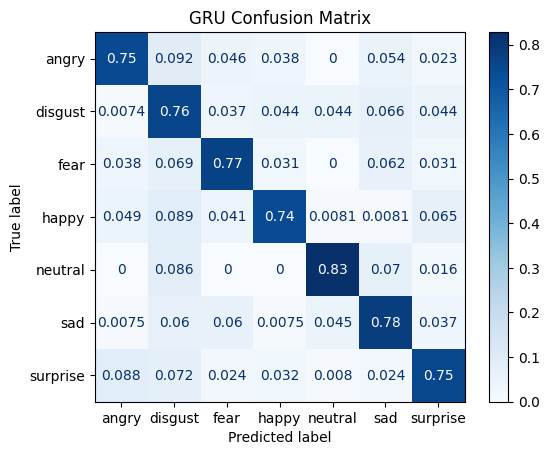

In [91]:
y_pred = GRU_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_labels, y_pred_labels, normalize='true')

plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=enc.categories_[0])
disp.plot(cmap='Blues')
plt.title('GRU Confusion Matrix')
plt.show()

In [92]:
# Evaluate the model
test_loss, test_accuracy = GRU_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

29/29 [==============================] - 0s 7ms/step - loss: 0.6689 - accuracy: 0.7682
Test Accuracy: 76.82%


In [119]:
from sklearn.metrics import precision_score, recall_score

# Predict labels for test data
y_pred = GRU_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Calculate precision and recall
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')

# Print precision and recall
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


29/29 [==============================] - 0s 7ms/step
Precision: 0.7746
Recall: 0.7682


In [93]:
# Predicting on test data using LSTM_model
pred_test_lstm = LSTM_model.predict(X_test)
y_pred_lstm = enc.inverse_transform(pred_test_lstm)

# Predicting on test data using CNN_Model
pred_test_cnn = CNN_Model.predict(X_test)
y_pred_cnn = enc.inverse_transform(pred_test_cnn)

# Predicting on test data using GRU_model
pred_test_gru = GRU_model.predict(X_test)
y_pred_gru = enc.inverse_transform(pred_test_gru)

# Actual labels
y_test = enc.inverse_transform(y_test)

29/29 [==============================] - 0s 4ms/step


In [94]:
# Check for random predictions
randdf = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
randdf['Predicted Labels'] = y_pred_lstm.flatten()
randdf['Actual Labels'] = y_test.flatten()

randdf.head(10)

,Predicted Labels,Actual Labels
0,surprise,surprise
1,angry,angry
2,angry,surprise
3,happy,happy
4,surprise,disgust
5,surprise,surprise
6,sad,neutral
7,disgust,disgust
8,neutral,neutral
9,disgust,disgust


In [95]:
randdf

,Predicted Labels,Actual Labels
0,surprise,surprise
1,angry,angry
2,angry,surprise
3,happy,happy
4,surprise,disgust
...,...,...
901,sad,sad
902,angry,angry
903,neutral,neutral
904,disgust,disgust


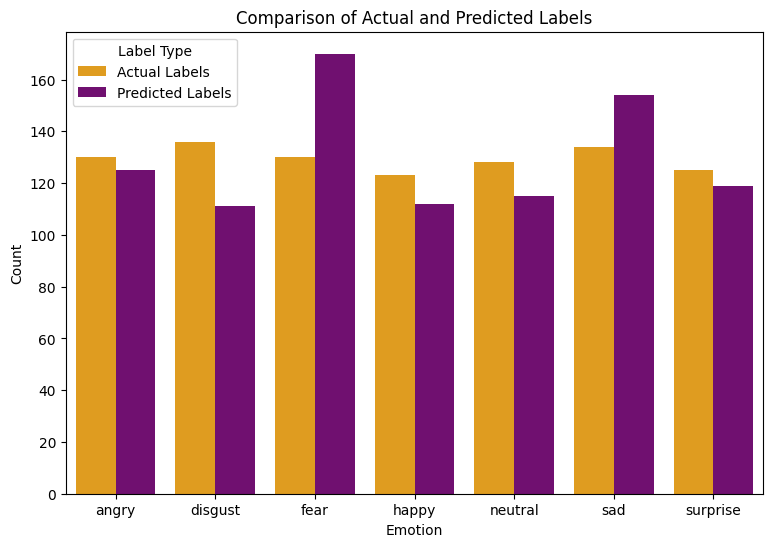

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the data for both actual and predicted labels into a single DataFrame
combined_df = pd.concat([randdf.groupby('Actual Labels').size().rename('Actual Labels'),
                         randdf.groupby('Predicted Labels').size().rename('Predicted Labels')],
                        axis=1)

# Melt the DataFrame to transform it into the appropriate format for seaborn's countplot
melted_df = combined_df.reset_index().melt(id_vars='index', var_name='Label Type', value_name='Count')

# Plot the grouped bar plot with contrasting colors and vertical orientation
plt.figure(figsize=(9,6))
sns.barplot(data=melted_df, x='index', y='Count', hue='Label Type', palette=['orange', 'purple'], orient='v')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Comparison of Actual and Predicted Labels')
plt.gca().spines[['top', 'right']].set_visible(True)
plt.legend(title='Label Type')
plt.show()


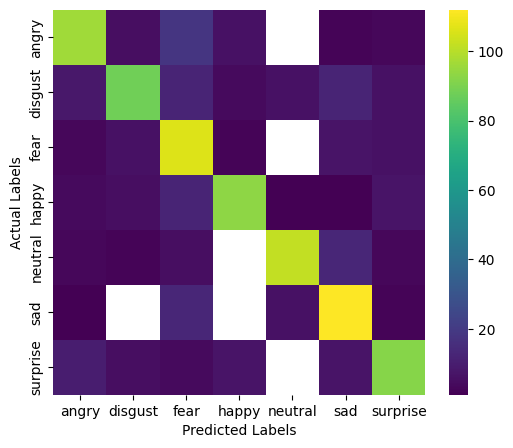

In [97]:
# @title Predicted Labels vs Actual Labels

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(6,5))
df_2dhist = pd.DataFrame({
    x_label: grp['Actual Labels'].value_counts()
    for x_label, grp in randdf.groupby('Predicted Labels')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Predicted Labels')
_ = plt.ylabel('Actual Labels')

In [98]:
# Check for random predictions
randdf1 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
randdf1['Predicted Labels'] = y_pred_cnn.flatten()
randdf1['Actual Labels'] = y_test.flatten()
randdf1.head(10)

,Predicted Labels,Actual Labels
0,surprise,surprise
1,angry,angry
2,surprise,surprise
3,happy,happy
4,angry,disgust
5,surprise,surprise
6,happy,neutral
7,disgust,disgust
8,disgust,neutral
9,disgust,disgust


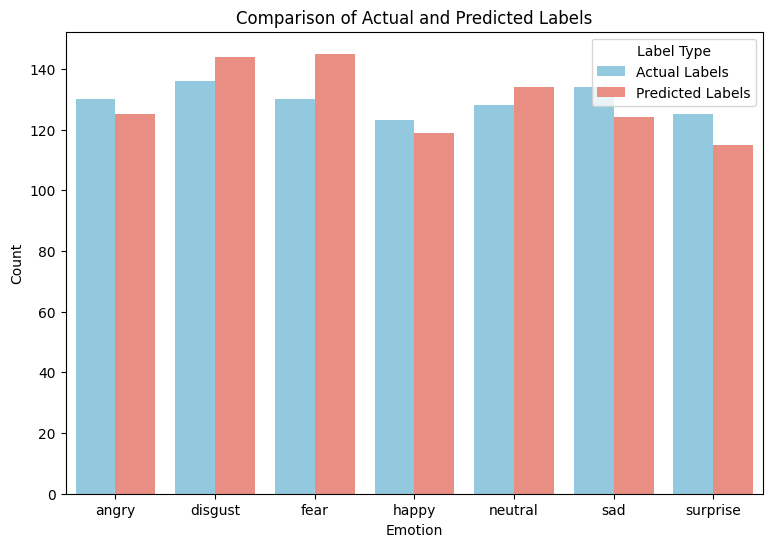

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the data for both actual and predicted labels into a single DataFrame
combined_df = pd.concat([randdf1.groupby('Actual Labels').size().rename('Actual Labels'),
                         randdf1.groupby('Predicted Labels').size().rename('Predicted Labels')],
                        axis=1)

# Melt the DataFrame to transform it into the appropriate format for seaborn's countplot
melted_df = combined_df.reset_index().melt(id_vars='index', var_name='Label Type', value_name='Count')

# Plot the grouped bar plot with contrasting colors and vertical orientation
plt.figure(figsize=(9, 6))
sns.barplot(data=melted_df, x='index', y='Count', hue='Label Type', palette=['skyblue', 'salmon'], orient='v')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Comparison of Actual and Predicted Labels')
plt.gca().spines[['top', 'right']].set_visible(True)
plt.legend(title='Label Type')
plt.show()


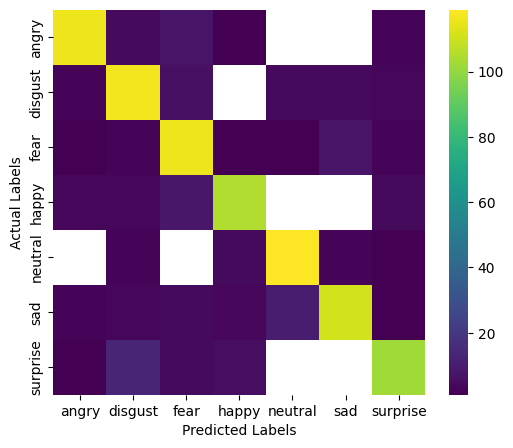

In [100]:
# @title Predicted Labels vs Actual Labels

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(6,5))
df_2dhist = pd.DataFrame({
    x_label: grp['Actual Labels'].value_counts()
    for x_label, grp in randdf1.groupby('Predicted Labels')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Predicted Labels')
_ = plt.ylabel('Actual Labels')

In [101]:
# Check for random predictions
randdf2 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
randdf2['Predicted Labels'] = y_pred_gru.flatten()
randdf2['Actual Labels'] = y_test.flatten()
randdf2.head(10)

,Predicted Labels,Actual Labels
0,surprise,surprise
1,angry,angry
2,surprise,surprise
3,happy,happy
4,happy,disgust
5,surprise,surprise
6,disgust,neutral
7,disgust,disgust
8,neutral,neutral
9,disgust,disgust


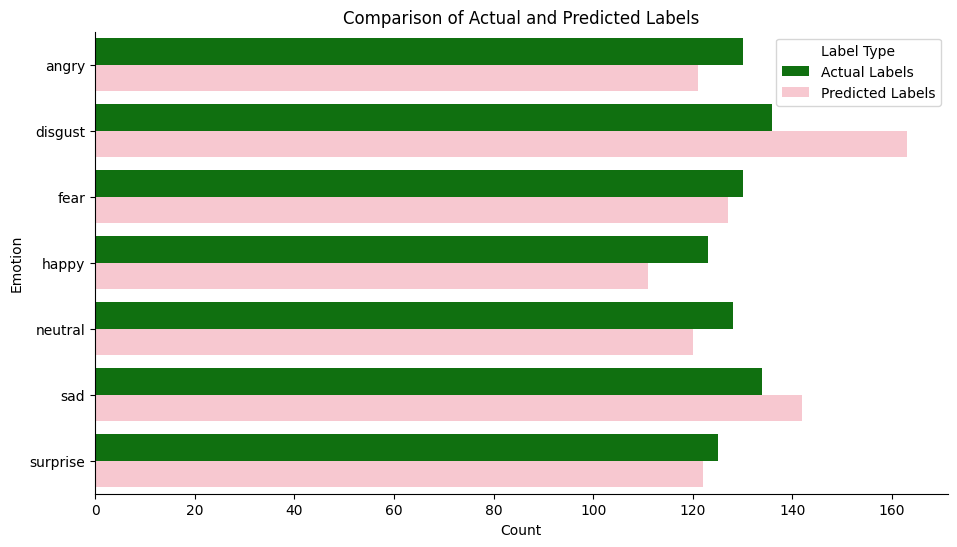

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the data for both actual and predicted labels into a single DataFrame
combined_df = pd.concat([randdf2.groupby('Actual Labels').size().rename('Actual Labels'),
                         randdf2.groupby('Predicted Labels').size().rename('Predicted Labels')],
                        axis=1)

# Melt the DataFrame to transform it into the appropriate format for seaborn's countplot
melted_df = combined_df.reset_index().melt(id_vars='index', var_name='Label Type', value_name='Count')

# Plot the grouped bar plot with custom colors
plt.figure(figsize=(11, 6))
sns.barplot(data=melted_df, x='Count', y='index', hue='Label Type', palette=['green', 'pink'])
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.title('Comparison of Actual and Predicted Labels')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


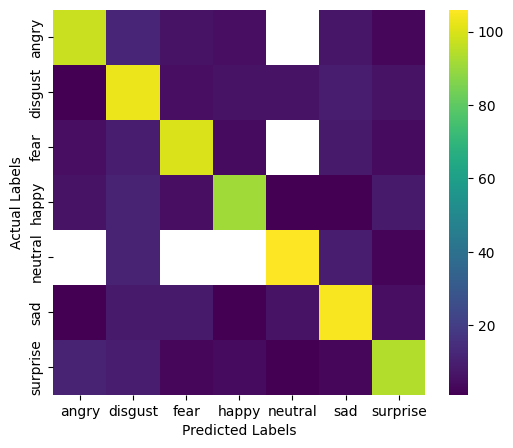

In [103]:
# @title Predicted Labels vs Actual Labels

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(6,5))
df_2dhist = pd.DataFrame({
    x_label: grp['Actual Labels'].value_counts()
    for x_label, grp in randdf2.groupby('Predicted Labels')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Predicted Labels')
_ = plt.ylabel('Actual Labels')

In [123]:
import pandas as pd

# Create a dictionary with the model names and corresponding metrics
metrics_dict = {
    'Model': ['LSTM', 'CNN', 'GRU'],
    'Loss': [0.6666, 0.4336, 0.6689],
    'Accuracy': [0.7826, 0.8675, 0.7682],
    'Precision': [0.7873, 0.8699, 0.7746],
    'Recall': [0.7826, 0.8675, 0.7682]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_dict)

# Set the 'Model' column as the index
metrics_df.set_index('Model', inplace=True)

# Display the DataFrame
print("Metrics for Each Model:")
metrics_df


Metrics for Each Model:


,Loss,Accuracy,Precision,Recall
Model,,,,
LSTM,0.6666,0.7826,0.7873,0.7826
CNN,0.4336,0.8675,0.8699,0.8675
GRU,0.6689,0.7682,0.7746,0.7682
